In [1]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [2]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [3]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [4]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [5]:
dong_name = input("핫플레이스가 위치한 행정동을 입력하세요 -->")
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

print(dong_name, '-', dong_code, '을(를)분석합니다!')

압구정동 - 11680545 을(를)분석합니다!


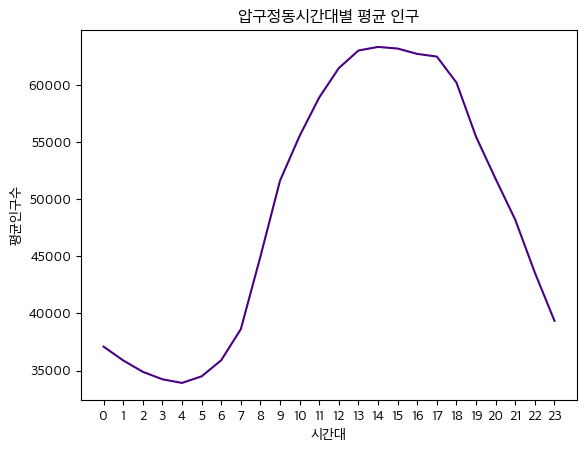

In [6]:
import matplotlib.pyplot as plt

population = [0 for i in range(24)]
for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

population = [p/31 for p in population]

plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + '시간대별 평균 인구')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

In [7]:
import datetime

datetime.date(2019, 12, 15).weekday()

6

In [8]:
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
    num = datetime.date(year, mon, day).weekday()
    if num < 5:
      weekday[time] += p
    else:
      weekend[time] += p

In [9]:
# 2019년 12월의 주중/주말 일수 구하기
weekday_cnt, weekend_cnt = 0, 0
for i in range(1, 32):
  if datetime.date(2019, 12, i).weekday() < 5:
    weekday_cnt += 1
  else:
    weekend_cnt += 1

print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

print('주중 인구:', weekday)
print('주말 인구:', weekend)

2019년 12월의 주중 일수 = 22 주말 일수 = 9
주중 인구: [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
주말 인구: [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.203344444446]


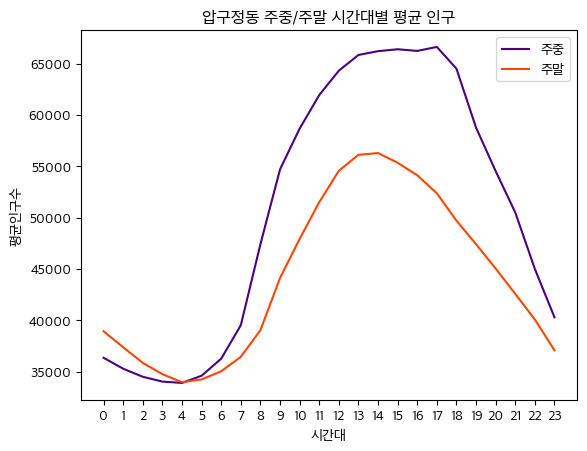

In [10]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구')
plt.plot(range(24), weekday, color='indigo', label='주중')
plt.plot(range(24), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

In [11]:
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time = row[1]
    male[time] += sum(row[4:18])      # 남성 인구 총합 구하기
    female[time] += sum(row[18:32])   # 여성 인구 총합 구하기
male = [m/31 for m in male]
female = [f/31 for f in female]

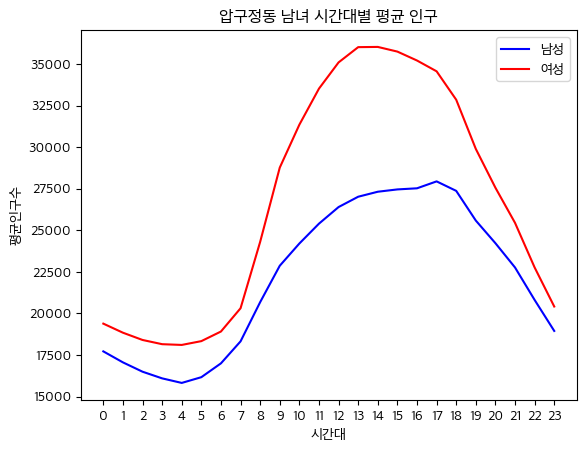

In [12]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.plot(range(24), male, color='b', label='남성')
plt.plot(range(24), female, color='r', label='여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.xticks(range(24), range(24))
plt.show()

In [13]:
# 핫플레이스가 있는 행정동
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

# 비교할 행정동
dong_name2 = input('비교할 행정동을 입력하세요 --> ')
for row in code_data:
  if row[-1] == dong_name2:
    dong_code2 = row[1]

In [14]:
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

  # 비교할 지역의 행정동인 경우
  elif row[2] == dong_code2:
    time, p = row[1], row[3]
    population2[time] += p

population = [p/31 for p in population]
population2 = [p/31 for p in population2]

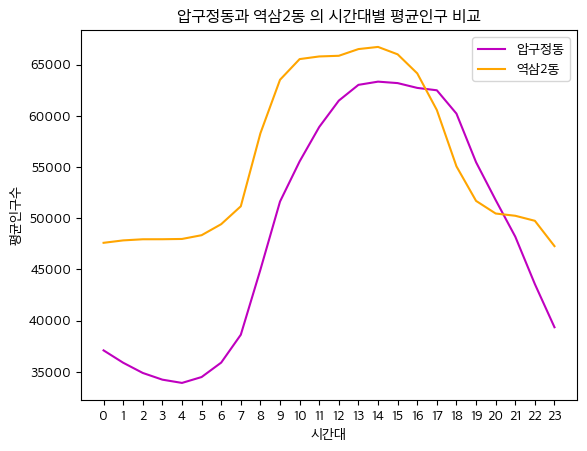

In [15]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), population, color='m', label=dong_name)
plt.plot(range(24), population2, color='orange', label=dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()